### SKLEARN
#### 1.funtion transformer
           i.log transform
           ii.reciprocal transform
           iii.square or square root transorm
           iv.custom transform 
#### 2.power transformer
            i.box-cox
            ii.yeo-johnson
#### 3.quantile transformer



##### funtion transformer are used to make our data normally distributed.


In [12]:
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('14.pipeline/with_pipeline/tested.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [3]:
df.isna().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X=df.drop(['Survived'],axis=1)
X.head()

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


In [7]:
y=df['Survived']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=52)
X_train.head()

,Age,Fare
274,30.27259,7.2250
325,23.00000,7.0500
306,30.00000,151.5500
172,23.00000,13.9000
68,31.00000,28.5375


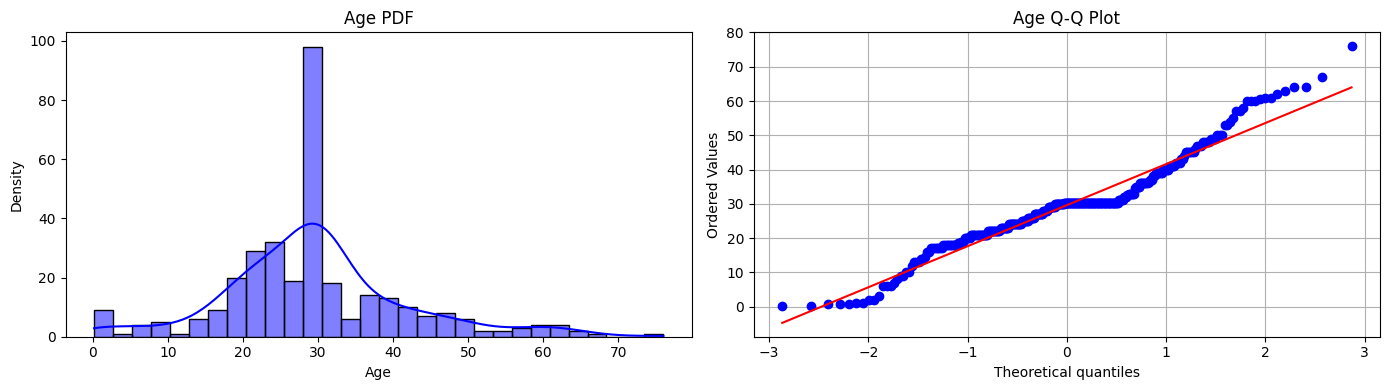

In [13]:

plt.figure(figsize=(14, 4))

# Subplot 1: Age Histogram with KDE (PDF)
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True, bins=30, color="blue")  # KDE added
plt.title('Age PDF')
plt.xlabel('Age')
plt.ylabel('Density')

# Subplot 2: Age Q-Q Plot
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Q-Q Plot')
plt.grid(True)  # Improves visibility of normality deviation

plt.tight_layout()  # Prevents overlapping
plt.show()


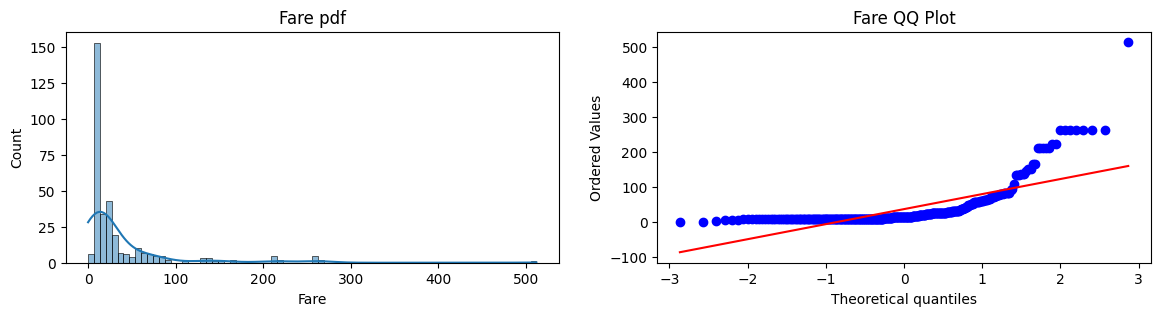

In [14]:
plt.figure(figsize=(14,3))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare pdf')


plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [15]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)

print("Accuracy score LR",accuracy_score(y_test,y_pred1)) 
print("Accuracy score DT",accuracy_score(y_test,y_pred2)) 

Accuracy score LR 0.5714285714285714
Accuracy score DT 0.5952380952380952


#### After log transform

In [16]:
trf= FunctionTransformer(func=np.log1p)

X_train_transform=trf.fit_transform(X_train)
X_test_transform=trf.fit_transform(X_test)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

y_pred1=clf1.predict(X_test_transform)
y_pred2=clf2.predict(X_test_transform)


print("Accuracy score LR",accuracy_score(y_test,y_pred1)) 
print("Accuracy score DT",accuracy_score(y_test,y_pred2))
print("-"*50)
# cross validation
X_transformed=trf.fit_transform(X)
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR after CV",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
print("DT after CV",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))


Accuracy score LR 0.5952380952380952
Accuracy score DT 0.6428571428571429
--------------------------------------------------
LR after CV 0.6556329849012775
DT after CV 0.5956445993031358


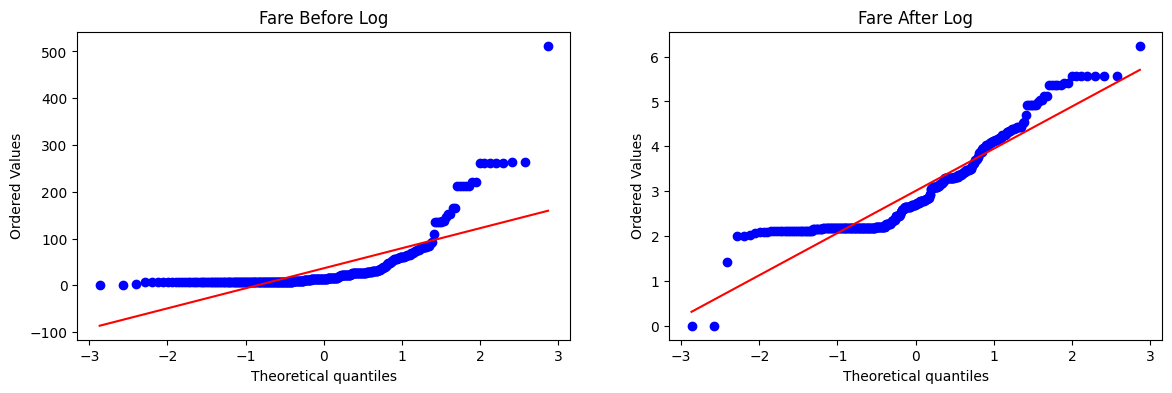

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

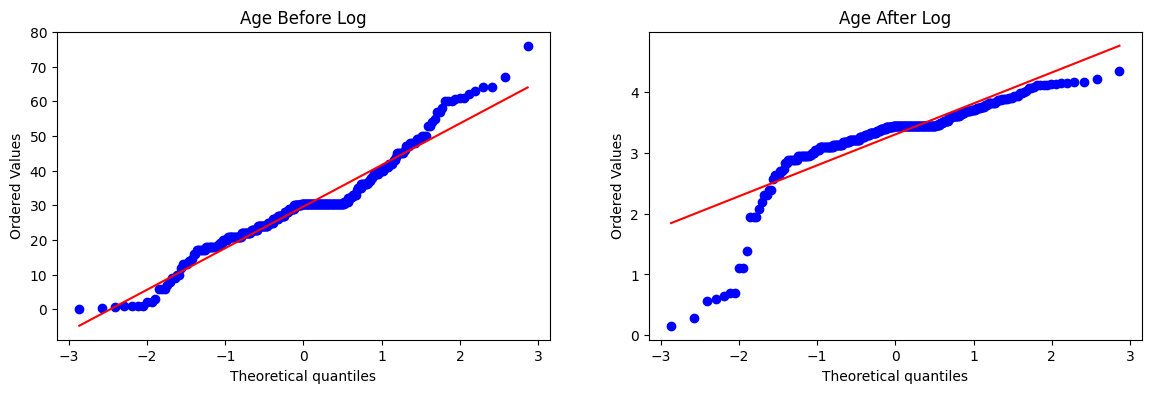

In [18]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transform['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [21]:
def apply_transorm(transform):
    trf= FunctionTransformer(func=transform)
    
    X_train_transform=trf.fit_transform(X_train)
    X_test_transform=trf.fit_transform(X_test)
    
    clf1=LogisticRegression()
    clf2=DecisionTreeClassifier()
    
    clf1.fit(X_train_transform,y_train)
    clf2.fit(X_train_transform,y_train)
    
    y_pred1=clf1.predict(X_test_transform)
    y_pred2=clf2.predict(X_test_transform)
    
    
    print("Accuracy score LR",accuracy_score(y_test,y_pred1)) 
    print("Accuracy score DT",accuracy_score(y_test,y_pred2))
    print("-"*50)
    # cross validation
    X_transformed=trf.fit_transform(X)
    clf1=LogisticRegression()
    clf2=DecisionTreeClassifier()
    
    print("LR after CV",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
    print("DT after CV",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))
    
    
    plt.figure(figsize=(12, 8))

    # Subplot 1: Fare Before Log Transform
    plt.subplot(221)  # Changed to 221 (2 rows, 2 cols, first plot)
    stats.probplot(X_train['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Log')
    
    # Subplot 2: Fare After Log Transform
    plt.subplot(222)  # Changed to 222 (2 rows, 2 cols, second plot)
    stats.probplot(X_train_transform['Fare'], dist="norm", plot=plt)
    plt.title('Fare After Log')
    
    # Subplot 3: Age Before Log Transform
    plt.subplot(223)  # Changed to 223 (2 rows, 2 cols, third plot)
    stats.probplot(X_train['Age'], dist="norm", plot=plt)
    plt.title('Age Before Log')
    
    # Subplot 4: Age After Log Transform
    plt.subplot(224)  # Changed to 224 (2 rows, 2 cols, fourth plot)
    stats.probplot(X_train_transform['Age'], dist="norm", plot=plt)
    plt.title('Age After Log')
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

Accuracy score LR 0.5714285714285714
Accuracy score DT 0.6428571428571429
--------------------------------------------------
LR after CV 0.6530778164924504
DT after CV 0.5957026713124274


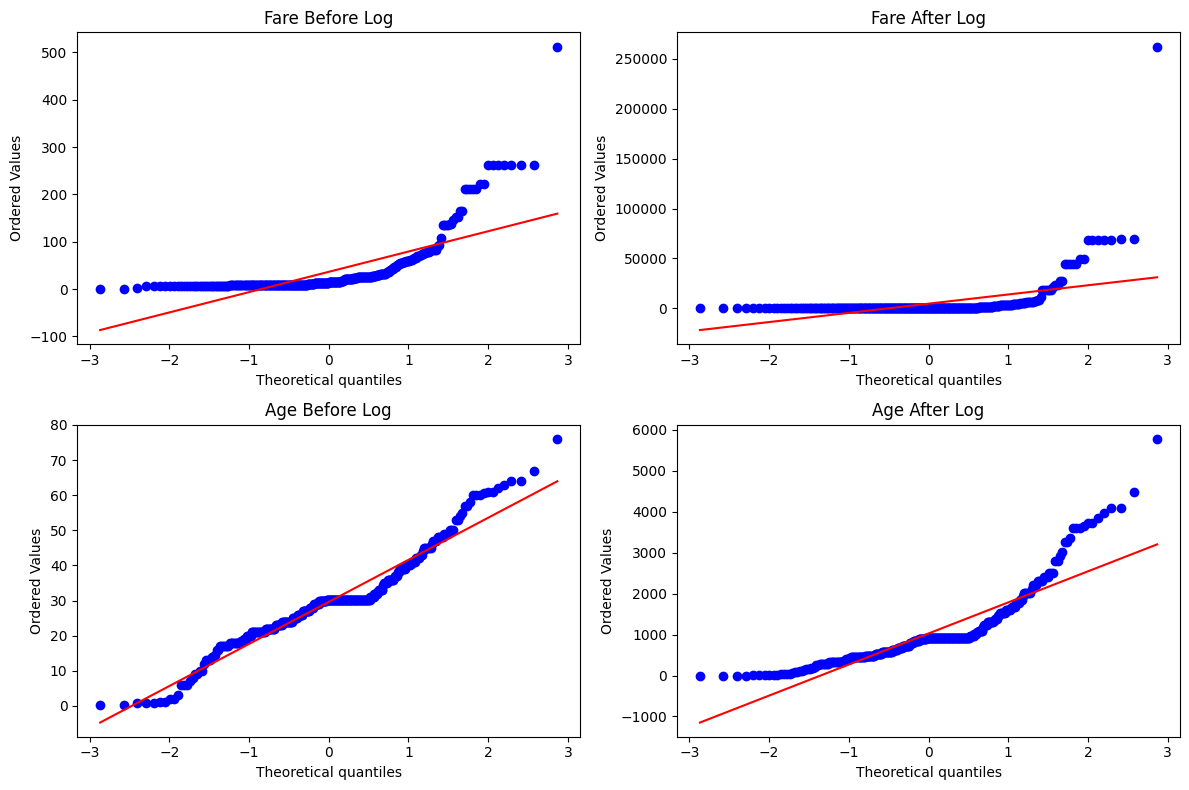

In [22]:
apply_transorm(lambda x:x**2)